In [4]:
import mne 
import os
import matplotlib.pyplot as plt
#from read_files import LoadFile, LoadAllRaw
import numpy as np
import scipy
from examples.split_based_on_resting import LoadEpochsP
import neurokit2 as nk



In [5]:
#get data
path ="EDF_test/"
folder = os.fsencode(path)

picks = 'ECG EKG'
#person3 only has VHF 

r, m, f = LoadEpochsP(folder=folder, path=path, patient_number = 2)


02IT-EDF+.edf
Setting channel interpolation method to {'eeg': 'spline'}.


l:\LovbeskyttetMapper\cEEG projekt - CONNECT-ME\Mappe til Cecilie og Katharina\nice\examples\split_based_on_resting.py:22: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw = raw.copy().interpolate_bads(reset_bads=True, verbose=True, mode='accurate') #interpolation of bad channels, if any


Sampling frequency of the instance is already 250.0, returning unmodified.
03TN-EDF+.edf
Used Annotations descriptions: ['Detections Inactive', 'Familiar voice', 'Impedance', 'Medical staff', 'Montage is now: ComAvgLwR', 'Montage is now: LongLwR', 'Montage is now: TransLwR', 'Resting']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 3801 original time points ...
1 bad epochs dropped


In [6]:
raw = mne.io.read_raw_edf('EDF_test/02IT-EDF+.edf',verbose=False)


In [46]:
ecg_data = m[0][0].get_data(picks=picks)[0]


[ 2.50278945e-05  1.51096894e-05 -6.01160819e-05 -8.62085907e-05
 -2.74622988e-05  2.85374132e-05  1.38889872e-05 -7.69007367e-05
 -1.11538161e-04 -5.03504645e-05]


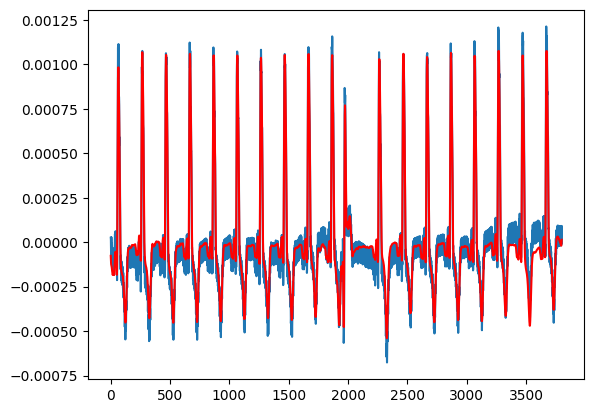

In [47]:
print(ecg_data[0,0:10])
ecg_clean = nk.ecg_clean(ecg_data[0], sampling_rate=250)
plt.plot(ecg_data[0])
plt.plot(ecg_clean,color='r')
plt.show()

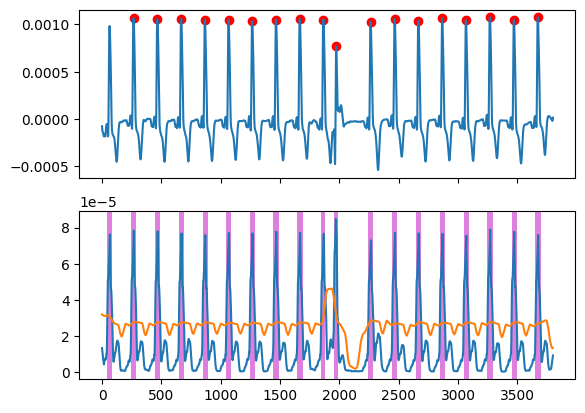

In [48]:
r_peaks = nk.ecg_findpeaks(ecg_clean,sampling_rate=250, show=True)

c:\Users\KSOE0397\AppData\Local\Programs\Python\Python312\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\KSOE0397\AppData\Local\Programs\Python\Python312\Lib\site-packages\neurokit2\complexity\entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
c:\Users\KSOE0397\AppData\Local\Programs\Python\Python312\Lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
c:\Users\KSOE0397\AppData\Local\Programs\Python\Python312\Lib\site-packages\neurokit2\complexity\optim_complexity_k.py:135: RuntimeWarning: inva

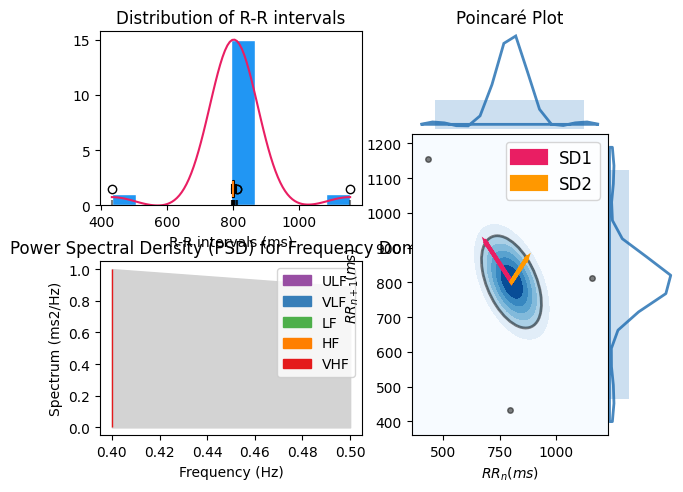

In [49]:
hrv_indices = nk.hrv(r_peaks, sampling_rate=250, show=True)

   HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  801.411765  128.108869         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_IQRNN  \
0         NaN         NaN  220.177201  227.398036  ...        4.0   

   HRV_SDRMSSD  HRV_Prc20NN  HRV_Prc80NN  HRV_pNN50  HRV_pNN20  HRV_MinNN  \
0     0.581844        796.8        807.2  17.647059  17.647059      432.0   

   HRV_MaxNN   HRV_HTI  HRV_TINN  
0     1156.0  1.888889     375.0  

[1 rows x 25 columns]


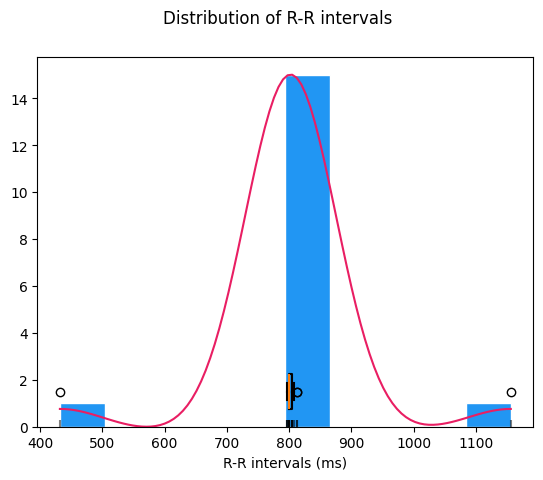

In [50]:
hrv = nk.hrv_time(r_peaks, sampling_rate=250, show=True)
print(hrv)

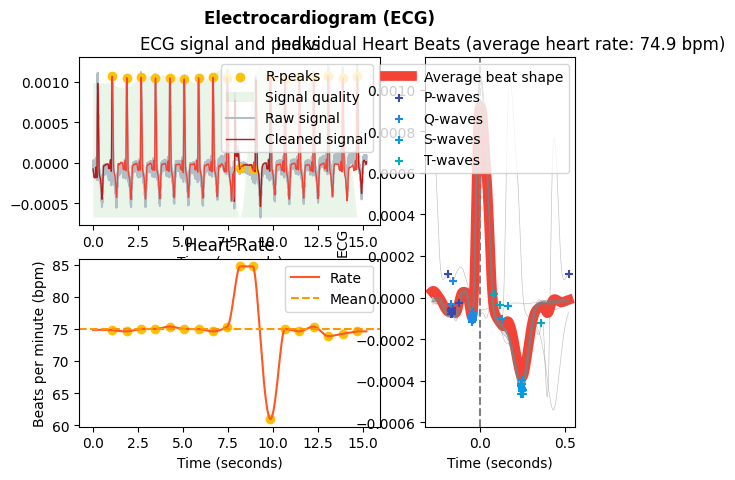

In [51]:
signals, info = nk.ecg_process(ecg_data[0], sampling_rate=250)
nk.ecg_plot(signals, info)
#rate = nk.signal_rate(r_peaks, sampling_rate=250, show=True)


   HRV_ULF  HRV_VLF  HRV_LF      HRV_HF  HRV_VHF      HRV_TP  HRV_LFHF  \
0      NaN      NaN     NaN  600.217776      NaN  600.217776       NaN   

   HRV_LFn  HRV_HFn  HRV_LnHF  
0      NaN      1.0  6.397293  


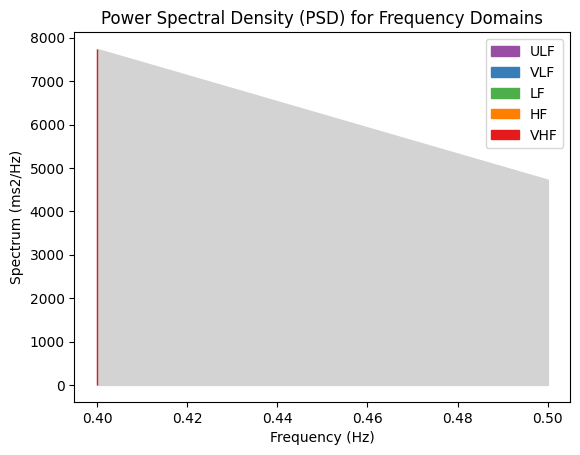

In [52]:
hrv_freq = nk.hrv_frequency(signals["ECG_R_Peaks"], sampling_rate=250, show=True, normalize=False)
print(hrv_freq)

In [68]:
def hrv_data(r):
    
    """
    Input r: 1 epoch
    """
    picks = 'ECG EKG'
    ecg_data = r[0][0].get_data(picks=picks)[0]
    ecg_clean = nk.ecg_clean(ecg_data[0], sampling_rate=250)
    r_peaks = nk.ecg_findpeaks(ecg_clean,sampling_rate=250, show=False)
    hrv_indices = nk.hrv(r_peaks, sampling_rate=250, show=False)
    hrv = nk.hrv_time(r_peaks, sampling_rate=250, show=False)
    signals, info = nk.ecg_process(ecg_data[0], sampling_rate=250)
    hrv_freq = nk.hrv_frequency(signals["ECG_R_Peaks"], sampling_rate=250, show=False, normalize=False)
    results = [hrv['HRV_MeanNN'][0], hrv['HRV_SDNN'][0], np.mean(signals['ECG_Rate']),np.std(signals['ECG_Rate']), np.min(signals['ECG_Rate']), np.max(signals['ECG_Rate']),  hrv_freq['HRV_VLF'][0],hrv_freq['HRV_LF'][0], hrv_freq['HRV_HF'][0],hrv_freq['HRV_VHF'][0],hrv_freq['HRV_TP'][0],hrv_freq['HRV_LFHF'][0]]
    return results

results = hrv_data(r=r)
print(results)


c:\Users\KSOE0397\AppData\Local\Programs\Python\Python312\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\KSOE0397\AppData\Local\Programs\Python\Python312\Lib\site-packages\neurokit2\complexity\entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
c:\Users\KSOE0397\AppData\Local\Programs\Python\Python312\Lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
c:\Users\KSOE0397\AppData\Local\Programs\Python\Python312\Lib\site-packages\neurokit2\complexity\optim_complexity_k.py:135: RuntimeWarning: inva

[790.1176470588235, 3.497898528780825, 75.94419694953135, 0.28256504793309684, 75.37688442211055, 76.53061224489795, nan, nan, 1.2756463819636856, nan, 1.2756463819636856, nan]
